In [1]:
!kaggle datasets download -d zynicide/wine-reviews

100%|██████████████████████████████████████| 50.9M/50.9M [00:02<00:00, 20.9MB/s]
100%|██████████████████████████████████████| 50.9M/50.9M [00:02<00:00, 17.8MB/s]


In [2]:
!unzip wine-reviews.zip -d data_input

Archive:  wine-reviews.zip
  inflating: data_input/winemag-data-130k-v2.csv  
  inflating: data_input/winemag-data-130k-v2.json  
  inflating: data_input/winemag-data_first150k.csv  


In [1]:
import torch 
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    


There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 4060 Laptop GPU


In [66]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [125]:
# read json into a dataframe

df = pd.read_json('./data_input/winemag-data-130k-v2.json')
df.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


In [126]:
df.isnull().sum()

points                       0
title                        0
description                  0
taster_name              26244
taster_twitter_handle    31213
price                     8996
designation              37465
variety                      1
region_1                 21247
region_2                 79460
province                    63
country                     63
winery                       0
dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   points                 129971 non-null  int64  
 1   title                  129971 non-null  object 
 2   description            129971 non-null  object 
 3   taster_name            103727 non-null  object 
 4   taster_twitter_handle  98758 non-null   object 
 5   price                  120975 non-null  float64
 6   designation            92506 non-null   object 
 7   variety                129970 non-null  object 
 8   region_1               108724 non-null  object 
 9   region_2               50511 non-null   object 
 10  province               129908 non-null  object 
 11  country                129908 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [128]:
# only show the null values on price column

x = df[df['price'].isnull()]
x['price'].head().to_frame()

,price
0,NaN
13,NaN
30,NaN
31,NaN
32,NaN


In [129]:
# find the highest price of wine by using sort 

df.sort_values(by='price', ascending=False).head(10)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
80290,88,Château les Ormes Sorbet 2013 Médoc,This ripe wine shows plenty of blackberry frui...,Roger Voss,@vossroger,3300.0,None,Bordeaux-style Red Blend,Médoc,None,Bordeaux,France,Château les Ormes Sorbet
15840,96,Château Pétrus 2014 Pomerol,The wine is a velvet glove in an iron fist. Th...,Roger Voss,@vossroger,2500.0,None,Bordeaux-style Red Blend,Pomerol,None,Bordeaux,France,Château Pétrus
98380,96,Domaine du Comte Liger-Belair 2010 La Romanée,"A superb wine from a great year, this is power...",Roger Voss,@vossroger,2500.0,None,Pinot Noir,La Romanée,None,Burgundy,France,Domaine du Comte Liger-Belair
120391,91,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,The nose on this single-vineyard wine from a s...,Matt Kettmann,@mattkettmann,2013.0,Roger Rose Vineyard,Chardonnay,Arroyo Seco,Central Coast,California,US,Blair
113564,96,Domaine du Comte Liger-Belair 2005 La Romanée,"A wonderfully complete wine, with all the elem...",Roger Voss,@vossroger,2000.0,None,Pinot Noir,La Romanée,None,Burgundy,France,Domaine du Comte Liger-Belair
65352,97,Château Pétrus 2011 Pomerol,This extravagantly perfumed wine has great jui...,Roger Voss,@vossroger,2000.0,None,Bordeaux-style Red Blend,Pomerol,None,Bordeaux,France,Château Pétrus
1558,98,Château Margaux 2009 Margaux,"A massive wine for Margaux, packed with tannin...",Roger Voss,@vossroger,1900.0,None,Bordeaux-style Red Blend,Margaux,None,Bordeaux,France,Château Margaux
111753,100,Château Lafite Rothschild 2010 Pauillac,"Almost black in color, this stunning wine is g...",Roger Voss,@vossroger,1500.0,None,Bordeaux-style Red Blend,Pauillac,None,Bordeaux,France,Château Lafite Rothschild
111755,100,Château Cheval Blanc 2010 Saint-Émilion,This is the finest Cheval Blanc for many years...,Roger Voss,@vossroger,1500.0,None,Bordeaux-style Red Blend,Saint-Émilion,None,Bordeaux,France,Château Cheval Blanc
1575,96,Château Mouton Rothschild 2009 Pauillac,"The purest Cabernet Sauvignon fruit, with dark...",Roger Voss,@vossroger,1300.0,None,Bordeaux-style Red Blend,Pauillac,None,Bordeaux,France,Château Mouton Rothschild


<Axes: xlabel='variety'>

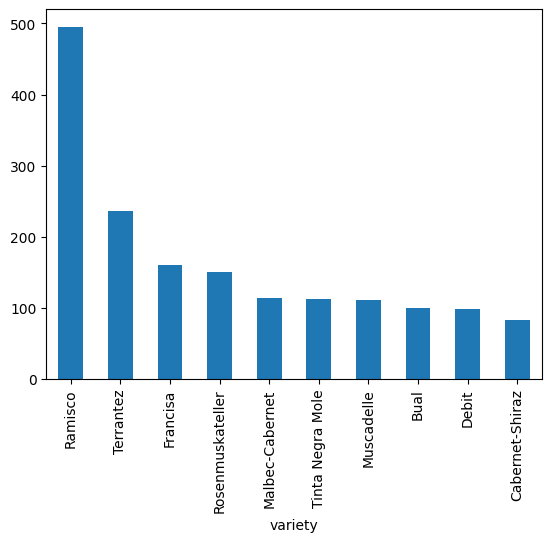

In [130]:
# show the plot of price and the variety of wine

df.groupby('variety').price.mean().sort_values(ascending=False).head(10).plot.bar()


In [131]:
# highest point of wine

df.sort_values(by='points', ascending=False).head(10)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
114972,100,Quinta do Noval 2011 Nacional Vintage (Port),"A powerful and ripe wine, strongly influenced ...",Roger Voss,@vossroger,650.0,Nacional Vintage,Port,None,None,Port,Portugal,Quinta do Noval
89729,100,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,This new release from a great vintage for Char...,Roger Voss,@vossroger,617.0,Le Mesnil Blanc de Blancs Brut,Chardonnay,Champagne,None,Champagne,France,Salon
113929,100,Charles Smith 2006 Royal City Syrah (Columbia ...,In 2005 Charles Smith introduced three high-en...,Paul Gregutt,@paulgwine,80.0,Royal City,Syrah,Columbia Valley (WA),Columbia Valley,Washington,US,Charles Smith
45781,100,Biondi Santi 2010 Riserva (Brunello di Montal...,"This gorgeous, fragrant wine opens with classi...",Kerin O’Keefe,@kerinokeefe,550.0,Riserva,Sangiovese,Brunello di Montalcino,None,Tuscany,Italy,Biondi Santi
123545,100,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Initially a rather subdued Frog; as if it has ...,Paul Gregutt,@paulgwine,80.0,Bionic Frog,Syrah,Walla Walla Valley (WA),Columbia Valley,Washington,US,Cayuse
118058,100,Verité 2007 La Muse Red (Sonoma County),This wine dazzles with perfection. Sourced fro...,None,None,450.0,La Muse,Bordeaux-style Red Blend,Sonoma County,Sonoma,California,US,Verité
42197,100,Casa Ferreirinha 2008 Barca-Velha Red (Douro),This is the latest release of what has long be...,Roger Voss,@vossroger,450.0,Barca-Velha,Portuguese Red,None,None,Douro,Portugal,Casa Ferreirinha
111756,100,Château Léoville Las Cases 2010 Saint-Julien,"A hugely powerful wine, full of dark, brooding...",Roger Voss,@vossroger,359.0,None,Bordeaux-style Red Blend,Saint-Julien,None,Bordeaux,France,Château Léoville Las Cases
111755,100,Château Cheval Blanc 2010 Saint-Émilion,This is the finest Cheval Blanc for many years...,Roger Voss,@vossroger,1500.0,None,Bordeaux-style Red Blend,Saint-Émilion,None,Bordeaux,France,Château Cheval Blanc
111754,100,Casanova di Neri 2007 Cerretalto (Brunello di...,It takes only a few moments before you appreci...,None,None,270.0,Cerretalto,Sangiovese Grosso,Brunello di Montalcino,None,Tuscany,Italy,Casanova di Neri


<Axes: xlabel='points'>

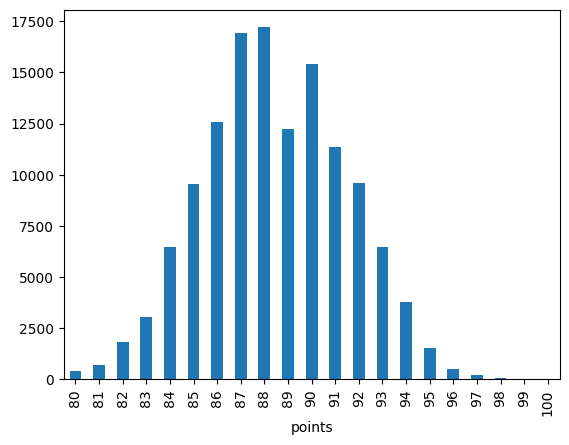

In [132]:
df['points'].value_counts().sort_index().plot.bar()

In [133]:
df['price'].value_counts().sum()

120975

In [134]:
# value counts of 88 points

counts_88_points = (df['points'] == 88).sum()
counts_88_points

17207

In [135]:
count_100_points = (df['points'] == 100).sum()
count_100_points

19

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   points                 129971 non-null  int64  
 1   title                  129971 non-null  object 
 2   description            129971 non-null  object 
 3   taster_name            103727 non-null  object 
 4   taster_twitter_handle  98758 non-null   object 
 5   price                  120975 non-null  float64
 6   designation            92506 non-null   object 
 7   variety                129970 non-null  object 
 8   region_1               108724 non-null  object 
 9   region_2               50511 non-null   object 
 10  province               129908 non-null  object 
 11  country                129908 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [137]:
df.dropna(subset=['taster_name', 'taster_twitter_handle'], how='all', inplace=True)


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103727 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   points                 103727 non-null  int64  
 1   title                  103727 non-null  object 
 2   description            103727 non-null  object 
 3   taster_name            103727 non-null  object 
 4   taster_twitter_handle  98758 non-null   object 
 5   price                  96479 non-null   float64
 6   designation            74990 non-null   object 
 7   variety                103727 non-null  object 
 8   region_1               82847 non-null   object 
 9   region_2               34767 non-null   object 
 10  province               103664 non-null  object 
 11  country                103664 non-null  object 
 12  winery                 103727 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 11.1+ MB


In [139]:
df.sort_values(by='points', ascending=False).head(10)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
114972,100,Quinta do Noval 2011 Nacional Vintage (Port),"A powerful and ripe wine, strongly influenced ...",Roger Voss,@vossroger,650.0,Nacional Vintage,Port,None,None,Port,Portugal,Quinta do Noval
36528,100,Krug 2002 Brut (Champagne),This is a fabulous wine from the greatest Cham...,Roger Voss,@vossroger,259.0,Brut,Champagne Blend,Champagne,None,Champagne,France,Krug
111753,100,Château Lafite Rothschild 2010 Pauillac,"Almost black in color, this stunning wine is g...",Roger Voss,@vossroger,1500.0,None,Bordeaux-style Red Blend,Pauillac,None,Bordeaux,France,Château Lafite Rothschild
122935,100,Château Haut-Brion 2014 Pessac-Léognan,"Full of ripe fruit, opulent and concentrated, ...",Roger Voss,@vossroger,848.0,None,Bordeaux-style White Blend,Pessac-Léognan,None,Bordeaux,France,Château Haut-Brion
58352,100,Château Léoville Barton 2010 Saint-Julien,"This is a magnificently solid wine, initially ...",Roger Voss,@vossroger,150.0,None,Bordeaux-style Red Blend,Saint-Julien,None,Bordeaux,France,Château Léoville Barton
113929,100,Charles Smith 2006 Royal City Syrah (Columbia ...,In 2005 Charles Smith introduced three high-en...,Paul Gregutt,@paulgwine,80.0,Royal City,Syrah,Columbia Valley (WA),Columbia Valley,Washington,US,Charles Smith
45781,100,Biondi Santi 2010 Riserva (Brunello di Montal...,"This gorgeous, fragrant wine opens with classi...",Kerin O’Keefe,@kerinokeefe,550.0,Riserva,Sangiovese,Brunello di Montalcino,None,Tuscany,Italy,Biondi Santi
123545,100,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Initially a rather subdued Frog; as if it has ...,Paul Gregutt,@paulgwine,80.0,Bionic Frog,Syrah,Walla Walla Valley (WA),Columbia Valley,Washington,US,Cayuse
111756,100,Château Léoville Las Cases 2010 Saint-Julien,"A hugely powerful wine, full of dark, brooding...",Roger Voss,@vossroger,359.0,None,Bordeaux-style Red Blend,Saint-Julien,None,Bordeaux,France,Château Léoville Las Cases
42197,100,Casa Ferreirinha 2008 Barca-Velha Red (Douro),This is the latest release of what has long be...,Roger Voss,@vossroger,450.0,Barca-Velha,Portuguese Red,None,None,Douro,Portugal,Casa Ferreirinha


In [140]:
df['province'].isnull().sum()

63

In [141]:
# we can drop collumn title,taster_twitter_handle, region_1, region_2, province

df_clean_two = df.drop(['title', 'taster_twitter_handle', 'region_1', 'region_2', 'province'], axis=1)
df_clean_two.head()

,points,description,taster_name,price,designation,variety,country,winery
0,87,"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,NaN,Vulkà Bianco,White Blend,Italy,Nicosia
1,87,"This is ripe and fruity, a wine that is smooth...",Roger Voss,15.0,Avidagos,Portuguese Red,Portugal,Quinta dos Avidagos
2,87,"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,14.0,None,Pinot Gris,US,Rainstorm
3,87,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,13.0,Reserve Late Harvest,Riesling,US,St. Julian
4,87,"Much like the regular bottling from 2012, this...",Paul Gregutt,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,US,Sweet Cheeks


In [142]:
# sentiment analysis on description, we will use vaderSentiment library

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
for sentence in df_clean_two['description'].head(5):
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

# we will create a new column called sentiment
df_clean_two['sentiment'] = df_clean_two['description'].apply(lambda x: analyzer.polarity_scores(x))
df_clean_two.head()

Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity. {'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'compound': 0.1531}
This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016. {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.6486}
Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented. {'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'compound': -0.128}
Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish. {'neg': 0.0, 'neu': 0.93, 'po

,points,description,taster_name,price,designation,variety,country,winery,sentiment
0,87,"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,NaN,Vulkà Bianco,White Blend,Italy,Nicosia,"{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp..."
1,87,"This is ripe and fruity, a wine that is smooth...",Roger Voss,15.0,Avidagos,Portuguese Red,Portugal,Quinta dos Avidagos,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp..."
2,87,"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,14.0,None,Pinot Gris,US,Rainstorm,"{'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'comp..."
3,87,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,13.0,Reserve Late Harvest,Riesling,US,St. Julian,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou..."
4,87,"Much like the regular bottling from 2012, this...",Paul Gregutt,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,US,Sweet Cheeks,"{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp..."


In [152]:
x = df_clean_two.sort_values(by= 'points', ascending=False).head(10)

# show only description and sentiment column 
x[['description', 'sentiment']]
x.head()

,points,description,taster_name,price,designation,variety,country,winery,sentiment
114972,100,"A powerful and ripe wine, strongly influenced ...",Roger Voss,650.0,Nacional Vintage,Port,Portugal,Quinta do Noval,"{'neg': 0.0, 'neu': 0.624, 'pos': 0.376, 'comp..."
36528,100,This is a fabulous wine from the greatest Cham...,Roger Voss,259.0,Brut,Champagne Blend,France,Krug,"{'neg': 0.042, 'neu': 0.811, 'pos': 0.146, 'co..."
111753,100,"Almost black in color, this stunning wine is g...",Roger Voss,1500.0,None,Bordeaux-style Red Blend,France,Château Lafite Rothschild,"{'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'comp..."
122935,100,"Full of ripe fruit, opulent and concentrated, ...",Roger Voss,848.0,None,Bordeaux-style White Blend,France,Château Haut-Brion,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp..."
58352,100,"This is a magnificently solid wine, initially ...",Roger Voss,150.0,None,Bordeaux-style Red Blend,France,Château Léoville Barton,"{'neg': 0.048, 'neu': 0.829, 'pos': 0.123, 'co..."


In [153]:
# show full description in x dataframe 

x_desc = x['description'].values[0]
x_sent = x['sentiment'].values[0]

print(x_desc)
print(x_sent)

A powerful and ripe wine, strongly influenced by its tannins, super ripe black fruit and great structure. It has all the hallmarks of a long-lived vintage Port—very rich, while densely textured and firm. This is an amazing, impressive, concentrated wine, with huge potential. From a parcel of ungrafted vines at Noval.
{'neg': 0.0, 'neu': 0.624, 'pos': 0.376, 'compound': 0.9774}


# About the Scoring 
[doc](https://github.com/cjhutto/vaderSentiment)

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:
- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05

**NOTE**: The compound score is the one most commonly used for sentiment analysis by most researchers, including the authors.